### Riddler Classic, fivethirtyeight.com, May 13, 2019

From https://fivethirtyeight.com/features/can-the-riddler-bros-beat-joe-dimaggios-hitting-streak/

Five brothers join the Riddler Baseball Independent Society, or RBIs. Each of them enjoys a lengthy career of 20 seasons, with 160 games per season and four plate appearances per game. (To make this simple, assume each plate appearance results in a hit or an out, so there are no sac flies or walks to complicate this math.)

Given that their batting averages are .200, .250, .300, .350 and .400, what are each brother’s chances of beating DiMaggio’s 56-game hitting streak at some point in his career? (Streaks can span across seasons.)

By the way, their cousin has a .500 average, but he will get tossed from the league after his 10th season when he tests positive for performance enhancers. What are his chances of beating the streak?

## Analytical Solution
Each at-bat is a discrete event. The streak is extended by getting at least one hit in each of those four attempts. The probability of getting a hit in a game as a function of four at-bats:

$Pr(H_{per game}) = Pr(AB1) + Pr(AB2) + Pr(AB3) + Pr(AB4)$

If Pr(H) is the probability of getting a hit and P(O) is the probability of making an out, then:

$Pr(H_{per game}) = Pr(H) + Pr(H)*Pr(O) + Pr(H)*Pr(O)^2 + Pr(H)*Pr(O)^3$

then the probability of starting a streak of **n** games at any given game is:

$Pr(Streak_n) = Pr(H_{per game})^n$

Each game is a new attempt of starting a streak of n games. However, new attempt of an n-game streak must occur n games before the end of the career:
$ Attempts = Games * Seasons - Streak$

Total probability should be $Attempts * Pr(Streak_n)$ ?

#### Library Imports

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from tabulate import tabulate
from scipy import stats
sns.set_style('whitegrid')
from decimal import Decimal
from datetime import timedelta

%matplotlib inline

##### Initial Values

In [2]:
#Internal
avg_200 = 200
avg_250 = 250
avg_300 = 300
avg_350 = 350
avg_400 = 400

In [3]:
record = 57
games = 160
seasons = 20
attempts = games * seasons - record
print(attempts)

3143


In [4]:
rbi = pd.DataFrame(data=[avg_200, avg_250, avg_300, avg_350, avg_400], columns=['Player'] )
rbi

,Player
0,200
1,250
2,300
3,350
4,400


Probability of getting a hit in a game as a result of four at bats.

In [5]:
def hit_game(x):
    hit = x / 1000
    out = 1 - hit
    prob = hit + hit * out + hit * out**2 + hit * out**3
    return prob

In [6]:
rbi['per_game'] = rbi.Player.apply(hit_game)
rbi['Streak'] = rbi.per_game**record
rbi['Career'] = rbi.Streak * attempts
rbi['Record'] = rbi.Career / record
rbi

,Player,per_game,Streak,Career,Record
0,200,0.590400,9.022811e-14,2.835870e-10,4.975210e-12
1,250,0.683594,3.832576e-10,1.204579e-06,2.113296e-08
2,300,0.759900,1.596310e-07,5.017204e-04,8.802111e-06
3,350,0.821494,1.356573e-05,4.263708e-02,7.480189e-04
4,400,0.870400,3.664176e-04,1.151650e+00,2.020439e-02


In [7]:
streak_length = rbi.transpose()
streak_length

,0,1,2,3,4
Player,2.000000e+02,2.500000e+02,3.000000e+02,350.000000,400.000000
per_game,5.904000e-01,6.835938e-01,7.599000e-01,0.821494,0.870400
Streak,9.022811e-14,3.832576e-10,1.596310e-07,0.000014,0.000366
Career,2.835870e-10,1.204579e-06,5.017204e-04,0.042637,1.151650
Record,4.975210e-12,2.113296e-08,8.802111e-06,0.000748,0.020204


In [8]:
# Length is a dataframe of the probability of each hitter having a hitting streak of index length using
# their probability of getting a hit per game
length = pd.DataFrame(index =np.arange(1,58,1))
for col in streak_length.columns:
    name = str(streak_length[col].loc['Player'])
    length[name] = streak_length[col].loc['per_game'] ** length.index
length.head()

,200.0,250.0,300.0,350.0,400.0
1,0.590400,0.683594,0.759900,0.821494,0.870400
2,0.348572,0.467300,0.577448,0.674852,0.757596
3,0.205797,0.319444,0.438803,0.554387,0.659412
4,0.121503,0.218370,0.333446,0.455425,0.573952
5,0.071735,0.149276,0.253386,0.374129,0.499568


Text(0, 0.5, 'Probability')

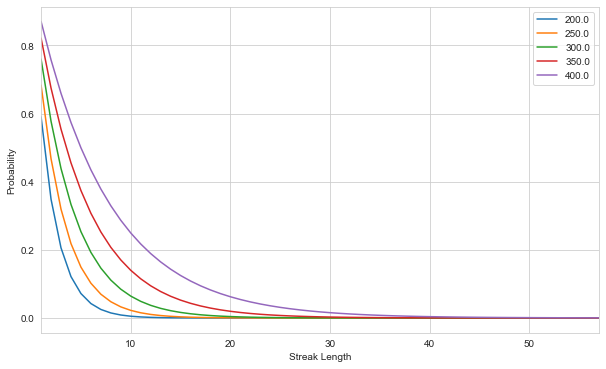

In [9]:
length.plot(figsize=(10,6))
plt.xlabel('Streak Length')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

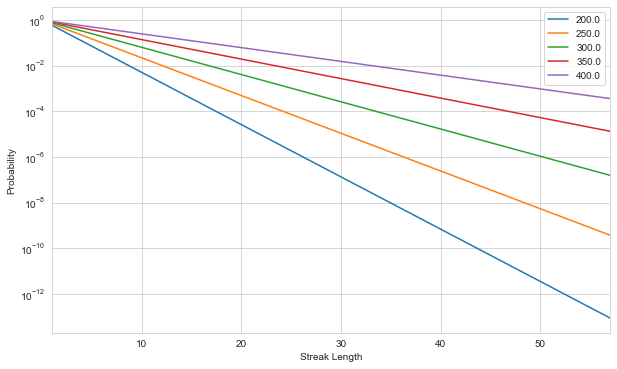

In [10]:
length.plot(figsize=(10,6), logy=True)
plt.xlabel('Streak Length')
plt.ylabel('Probability')

Over a career of attempts

No handles with labels found to put in legend.
No handles with labels found to put in legend.


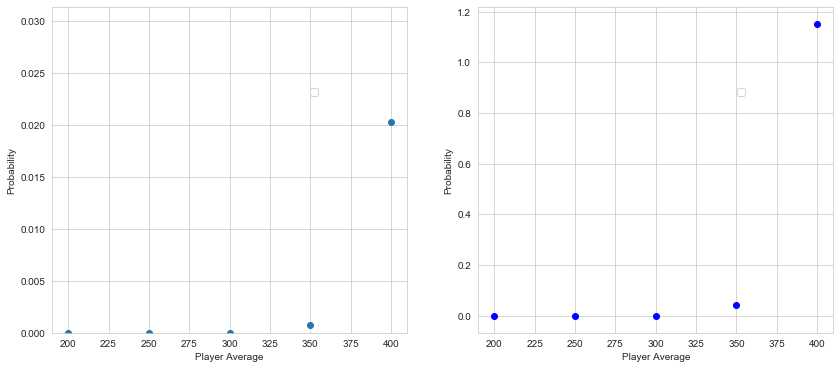

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rbi.Player, rbi.Record)
plt.legend(bbox_to_anchor=(0.75, 0.75), loc=1, borderaxespad=0.)
plt.xlabel('Player Average')
plt.ylabel('Probability')
plt.ylim(0)

plt.subplot(1,2,2)
plt.scatter(rbi.Player, rbi.Career, color ='b')
plt.xlabel('Player Average')
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(0.75, 0.75), loc=1, borderaxespad=0.)

## Numerical Solution
### cadCAD Setup
#### ----------------cadCAD LIBRARY IMPORTS------------------------

In [12]:
# from SimCAD import configs
# from SimCAD.configuration import Configuration
# from SimCAD.configuration.utils import exo_update_per_ts, proc_trigger, bound_norm_random, \
#     ep_time_step

from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
#from simulations.validation import sweep_config
from cadCAD import configs
from cadCAD.configuration import append_configs
from cadCAD.configuration.utils import ep_time_step, config_sim

In [13]:
#from cadCAD.configuration.utils.parameterSweep import config_sim

In [14]:
from typing import Dict, List

#### ----------------Random State Seed-----------------------------

In [15]:
seed = {
#    'z': np.random.RandomState(1)
}

#### Timestamp

In [16]:
ts_format = '%Y-%m-%d %H:%M:%S'
t_delta = timedelta(days=0, minutes=0, seconds=1)
def set_time(_g, step, sL, s, _input):
    y = 'timestamp'
    x = ep_time_step(s, dt_str=s['timestamp'], fromat_str=ts_format, _timedelta=t_delta)
    return (y, x)

### Random Process Function on BA

In [17]:
def random(twentieths):
    '''Returns normal random variable generated by first two central moments of price change of input ticker'''
    rv = np.random.randint(0,20)
    if rv >= twentieths:
        hit = False
    else:
        hit = True
        
    
    return hit

### Behavior Results for each AB

In [18]:
# First AB
def AB(_g, step, sL, s):
    hit_200 = random(avg_200 / 50)
    hit_250 = random(avg_250 / 50)
    hit_300 = random(avg_300 / 50)
    hit_350 = random(avg_350 / 50)
    hit_400 = random(avg_400 / 50)
    return {'player_200': hit_200, 'player_250': hit_250, 'player_300': hit_300, 'player_350': hit_350, 'player_400': hit_400, }

### At-Bat Results for Each Hitter

In [19]:

def AB_200(_g,  step, sL, s, _input):
    key = 'player_200'
    value = _input['player_200']
    return key, value

def AB_250(_g,  step, sL, s, _input):
    key = 'player_250'
    value = _input['player_250']
    return key, value

def AB_300(_g,  step, sL, s, _input):
    key = 'player_300'
    value = _input['player_300']
    return key, value

def AB_350(_g,  step, sL, s, _input):
    key = 'player_350'
    value = _input['player_350']
    return key, value

def AB_400(_g,  step, sL, s, _input):
    key = 'player_400'
    value = _input['player_400']
    return key, value


In [20]:
# State of transmitting True for any of the 4 ABs
def game_hit_200(_g,  step, sL, s, _input):
    key = 'game_200'
    value = _input['player_200']    
    if step == 1:
#        print(step)
        return key, value
    elif s['game_200'] == False:
#        print('input',_input['player_200'], 'output', s['test_200'])
        return key, value
    else:
        return key, s['game_200']    


In [21]:
# State of transmitting True for any of the 4 ABs
def game_hit_250(_g,  step, sL, s, _input):
    key = 'game_250'
    value = _input['player_250']    
    if step == 1:
#        print(step)
        return key, value
    elif s['game_250'] == False:
#        print('input',_input['player_250'], 'output', s['test_250'])
        return key, value
    else:
        return key, s['game_250']    


In [22]:
# State of transmitting True for any of the 4 ABs
def game_hit_300(_g,  step, sL, s, _input):
    key = 'game_300'
    value = _input['player_300']    
    if step == 1:
#        print(step)
        return key, value
    elif s['game_300'] == False:
#        print('input',_input['player_300'], 'output', s['test_300'])
        return key, value
    else:
        return key, s['game_300']    


In [23]:
# State of transmitting True for any of the 4 ABs
def game_hit_350(_g,  step, sL, s, _input):
    key = 'game_350'
    value = _input['player_350']    
    if step == 1:
#        print(step)
        return key, value
    elif s['game_350'] == False:
#        print('input',_input['player_350'], 'output', s['test_350'])
        return key, value
    else:
        return key, s['game_350']    


In [24]:
# State of transmitting True for any of the 4 ABs
def game_hit_400(_g,  step, sL, s, _input):
    key = 'game_400'
    value = _input['player_400']    
    if step == 1:
#        print(step)
        return key, value
    elif s['game_400'] == False:
#        print('input',_input['player_400'], 'output', s['test_400'])
        return key, value
    else:
        return key, s['game_400']    


### cadCAD Genesis States and State Update Blocks

In [25]:
g: Dict[str, List[int]] = {
    'gamma_1': [0.5, 1],
#     'omega': [7]
}

#### SIMULATION RUN SETUP

In [26]:
# games = 160
# seasons = 20
time_step_count = games * seasons
run_count = 2

#### CONFIGURATION DICTIONARY

In [27]:
#----------STATE VARIABLE Genesis DICTIONARY---------------------------
genesis_states = {
    'player_200' : False,       
    'player_250' : False,
    'player_300' : False,
    'player_350' : False,
    'player_400' : False,
    'game_200'   : False,
    'game_250'   : False,
    'game_300'   : False,
    'game_350'   : False,
    'game_400'   : False,
    'timestamp': '2018-10-01 15:16:24',     #es5
}
#--------------EXOGENOUS STATE MECHANISM DICTIONARY--------------------
exogenous_states =     {
    "timestamp": set_time,
    }

#--------------ENVIRONMENTAL PROCESS DICTIONARY------------------------
env_processes = {
}
#----------------------SIMULATION RUN SETUP----------------------------
sim_config = config_sim(
    {
    "N": run_count,
    "T": range(time_step_count)
#     "M": g  # for parameter sweep
}
)
#----------------------MECHANISM AND BEHAVIOR DICTIONARY---------------
partial_state_update_block = {
    "AB_1": {                 
        "policies": {  
           'AB': AB    #AB_executor('player_200')
        },
        "variables": {
            'player_200'            : AB_200,
            'player_250'            : AB_250,
            'player_300'            : AB_300,
            'player_350'            : AB_350,
            'player_400'            : AB_400,
            'game_200'              : game_hit_200,
            'game_250'              : game_hit_250,
            'game_300'              : game_hit_300,
            'game_350'              : game_hit_350,
            'game_400'              : game_hit_400,
        }
    },
    "AB_2": {                 
        "policies": {  
           'AB': AB    #AB_executor('player_200')
        },
        "variables": {
            'player_200'            : AB_200,
            'player_250'            : AB_250,
            'player_300'            : AB_300,
            'player_350'            : AB_350,
            'player_400'            : AB_400,
            'game_200'              : game_hit_200,
            'game_250'              : game_hit_250,
            'game_300'              : game_hit_300,
            'game_350'              : game_hit_350,
            'game_400'              : game_hit_400,
        }
    },
    "AB_3": {                 
        "policies": {  
           'AB': AB    #AB_executor('player_200')
        },
        "variables": {
            'player_200'            : AB_200,
            'player_250'            : AB_250,
            'player_300'            : AB_300,
            'player_350'            : AB_350,
            'player_400'            : AB_400,
            'game_200'              : game_hit_200,
            'game_250'              : game_hit_250,
            'game_300'              : game_hit_300,
            'game_350'              : game_hit_350,
            'game_400'              : game_hit_400,
        }
    },
    "AB_4": {                 
        "policies": {  
           'AB': AB    #AB_executor('player_200')
        },
        "variables": {
            'player_200'            : AB_200,
            'player_250'            : AB_250,
            'player_300'            : AB_300,
            'player_350'            : AB_350,
            'player_400'            : AB_400,
            'game_200'              : game_hit_200,
            'game_250'              : game_hit_250,
            'game_300'              : game_hit_300,
            'game_350'              : game_hit_350,
            'game_400'              : game_hit_400,
        }
    },
}

append_configs(
    sim_configs=sim_config,
    initial_state=genesis_states,
    seeds=seed,
    raw_exogenous_states= exogenous_states,
    env_processes=env_processes,
    partial_state_update_blocks=partial_state_update_block
)

[{'N': 2, 'T': range(0, 3200), 'M': [{}]}]


#### Running cadCAD

In [28]:
exec_mode = ExecutionMode()

first_config = configs # only contains config1
single_proc_ctx = ExecutionContext(context=exec_mode.single_proc)
run1 = Executor(exec_context=single_proc_ctx, configs=first_config)
run1_raw_result, tensor_field = run1.execute()
result = pd.DataFrame(run1_raw_result)
print(result.head())
#return result


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: single_proc: [<cadCAD.configuration.Configuration object at 0x000001DE35B84780>]
Configurations: [<cadCAD.configuration.Configuration object at 0x000001DE35B84780>]


C:\Users\mbarl\AppData\Local\Continuum\anaconda3\lib\site-packages\cadCAD\utils\__init__.py:113: FutureWarning: The use of a dictionary to describe Partial State Update Blocks will be deprecated. Use a list instead.
  FutureWarning)


   player_200  player_250  player_300  player_350  player_400  game_200  \
0       False       False       False       False       False     False   
1       False        True       False       False       False     False   
2       False       False        True       False        True     False   
3        True        True       False        True        True      True   
4       False       False       False       False        True      True   

   game_250  game_300  game_350  game_400            timestamp  run  substep  \
0     False     False     False     False  2018-10-01 15:16:24    1        0   
1      True     False     False     False  2018-10-01 15:16:25    1        1   
2      True      True     False      True  2018-10-01 15:16:25    1        2   
3      True      True      True      True  2018-10-01 15:16:25    1        3   
4      True      True      True      True  2018-10-01 15:16:25    1        4   

   timestep  
0         0  
1         1  
2         1  
3         1 

In [29]:
df = result

In [30]:
df.head()

,player_200,player_250,player_300,player_350,player_400,game_200,game_250,game_300,game_350,game_400,timestamp,run,substep,timestep
0,False,False,False,False,False,False,False,False,False,False,2018-10-01 15:16:24,1,0,0
1,False,True,False,False,False,False,True,False,False,False,2018-10-01 15:16:25,1,1,1
2,False,False,True,False,True,False,True,True,False,True,2018-10-01 15:16:25,1,2,1
3,True,True,False,True,True,True,True,True,True,True,2018-10-01 15:16:25,1,3,1
4,False,False,False,False,True,True,True,True,True,True,2018-10-01 15:16:25,1,4,1


In [31]:
# Aggregates df of Monte Carlo runs by timestep. Creates dataframes of mean, median, sd, and minimum.
aggregate_dimension = 'timestep'

mean_df = df.groupby(aggregate_dimension).mean().reset_index()
median_df = df.groupby(aggregate_dimension).median().reset_index()
std_df = df.groupby(aggregate_dimension).std().reset_index()
min_df = df.groupby(aggregate_dimension).min().reset_index()

#### Plot Functions

In [32]:
def dist_plot(x, y,lx=False,ly=False, suppMin=False):       
    '''
    Generates Monte Carlo plot of mean, median, mean + 1 sd. Option to plot either mean-1 sd or minimum.
    Option to plot log-scale on x or y.
    '''
    plt.figure(figsize=(10,6))
    if not(suppMin):
        plt.plot(mean_df[x].values, mean_df[y].values,
             mean_df[x].values,median_df[y].values,
             mean_df[x].values,mean_df[y].values+std_df[y].values,
             mean_df[x].values,min_df[y].values)
        plt.legend(['mean', 'median', 'mean+ 1*std', 'min'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    else:
        plt.plot(mean_df[x].values, mean_df[y].values,
             mean_df[x].values,median_df[y].values,
             mean_df[x].values,mean_df[y].values+std_df[y].values,
             mean_df[x].values,mean_df[y].values-std_df[y].values)
        plt.legend(['mean', 'median', 'mean+ 1*std', 'mean - 1*std'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.xlabel(x)
    plt.ylabel(y)
    if lx:
        plt.xscale('log')
    
    if ly:
        plt.yscale('log')

In [33]:
def first_five_plot(state_var):
    '''
    Enter state variable name as a string. Generates timeseries plot of at most the first five
    Monte Carlo runs along with the mean of ALL runs. Use run_count variable name for number of runs.
    '''
    plt.figure(figsize=(10,6))
    if run_count < 5:
        runs = run_count
    else:
        runs = 5
    for r in range(1,runs+1):
        legend_name = 'Run ' + str(r)
        plt.plot(df[df.run==r].timestep, df[df.run==r][state_var], label = legend_name )
    plt.scatter(mean_df.timestep, mean_df[state_var], label = 'Mean', color = 'black')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Timestep')
    plt.ylabel(state_var)
    title_text = 'Performance of ' + state_var + ' over the First ' + str(runs) + ' Monte Carlo Runs'
    plt.title(title_text)

In [34]:
def overview_plot(mech_steps, *args, **kwargs):
    '''
    *args, enter df fields of desired plots
    uses time_step_count and run_count variable name from simulation runs.
    **kwarg y_label for custom y axis title
    **kwarg legend_label for custom legend label
    '''
    plt.figure(figsize=(10,6))
    for r in range(run_count):
        plt.axvline(x= mech_steps * time_step_count * r, color ='b')
    for arg in args:
        for key, value in kwargs.items():
            if key == 'y_label':
                plt.ylabel(value)
            if key == 'legend_label':
                plt.plot(arg, label = value)
            else:
                plt.plot(arg) #, label = arg.in
#         plt.plot(arg, label = y_label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    x_text = 'Timestep Repeated over ' + str(run_count) + ' Runs'
    plt.xlabel(x_text)
    plt.title('Overview of Repeated Monte Carlo Runs')

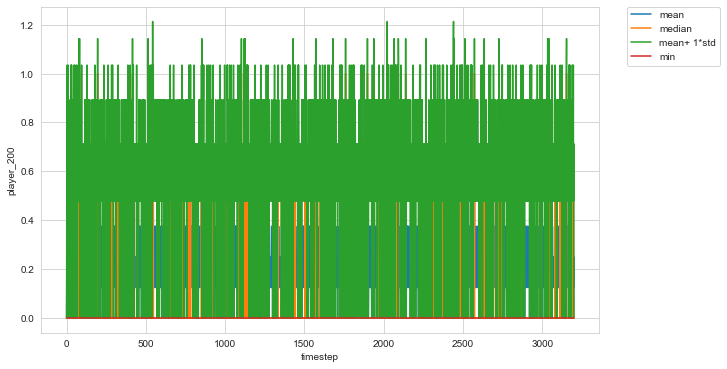

In [35]:
dist_plot('timestep', 'player_200',suppMin=False)

In [36]:
df_sub = df
print('Average Check of .200 = ', len(df_sub[df_sub.player_200 == True]) / len(df_sub))
print('Average Check of .250 = ', len(df_sub[df_sub.player_250 == True]) / len(df_sub))
print('Average Check of .300 = ', len(df_sub[df_sub.player_300 == True]) / len(df_sub))
print('Average Check of .350 = ', len(df_sub[df_sub.player_350 == True]) / len(df_sub))
print('Average Check of .400 = ', len(df_sub[df_sub.player_400 == True]) / len(df_sub))


Average Check of .200 =  0.20431997500195298
Average Check of .250 =  0.24654323880946802
Average Check of .300 =  0.29935161315522224
Average Check of .350 =  0.3481759237559566
Average Check of .400 =  0.40137489258651665


In [37]:
# class Player():
#     def __init__(self, average):
#         self.average = average
# player_200 = Player(200)
# print(player_200)
# print(player_200.average)

In [38]:
# credit https://stackoverflow.com/questions/52717996/how-can-i-count-the-number-of-consecutive-trues-in-a-dataframe
def maxisland_start_len_mask(a, fillna_index = -1, fillna_len = 0):
    # a is a boolean array

    pad = np.zeros(a.shape[1],dtype=bool)
    mask = np.vstack((pad, a, pad))

    mask_step = mask[1:] != mask[:-1]
    idx = np.flatnonzero(mask_step.T)
    island_starts = idx[::2]
    island_lens = idx[1::2] - idx[::2]
    n_islands_percol = mask_step.sum(0)//2

    bins = np.repeat(np.arange(a.shape[1]),n_islands_percol)
    scale = island_lens.max()+1

    scaled_idx = np.argsort(scale*bins + island_lens)
    grp_shift_idx = np.r_[0,n_islands_percol.cumsum()]
    max_island_starts = island_starts[scaled_idx[grp_shift_idx[1:]-1]]

    max_island_percol_start = max_island_starts%(a.shape[0]+1)

    valid = n_islands_percol!=0
    cut_idx = grp_shift_idx[:-1][valid]
    max_island_percol_len = np.maximum.reduceat(island_lens, cut_idx)

    out_len = np.full(a.shape[1], fillna_len, dtype=int)
    out_len[valid] = max_island_percol_len
    out_index = np.where(valid,max_island_percol_start,fillna_index)
    return out_index, out_len
# credit https://stackoverflow.com/questions/52717996/how-can-i-count-the-number-of-consecutive-trues-in-a-dataframe

In [39]:
streak_df = pd.DataFrame(index=range(1,run_count+1),columns=['Player_200', 'Player_250','Player_300','Player_350','Player_400'] )

for r in range(1,run_count+1):
    season_df = df[(df.substep == 4) & (df.run == r)]
  
    a = np.array([season_df.game_200, season_df.game_250,season_df.game_300,season_df.game_350,season_df.game_400])
    a = np.transpose(a)
    streak_start, streak_length = maxisland_start_len_mask(a, fillna_index=-1, fillna_len=0)

    for index, col in enumerate(streak_df.columns):

        streak_df[col][r] = streak_length[index]

In [40]:
a = streak_df.Player_400[streak_df.Player_400 > 56].count()
b = streak_df.Player_350[streak_df.Player_350 > 56].count()
c = streak_df.Player_300[streak_df.Player_300 > 56].count()
d = streak_df.Player_250[streak_df.Player_250 > 56].count()
e = streak_df.Player_200[streak_df.Player_200 > 56].count()
print('400 times = ', a, ' over ', run_count, ' simulated careers or ', a * 100 / run_count, '%' )
print('350 times = ', b, ' over ', run_count, ' simulated careers or ', b * 100 / run_count, '%' )
print('300 times = ', c, ' over ', run_count, ' simulated careers or ', c * 100 / run_count, '%' )
print('250 times = ', d, ' over ', run_count, ' simulated careers or ', d * 100 / run_count, '%' )
print('200 times = ', e, ' over ', run_count, ' simulated careers or ', e * 100 / run_count, '%' )
print('Total = ', streak_df[streak_df.values > 56].count().values[0])

400 times =  0  over  2  simulated careers or  0.0 %
350 times =  0  over  2  simulated careers or  0.0 %
300 times =  0  over  2  simulated careers or  0.0 %
250 times =  0  over  2  simulated careers or  0.0 %
200 times =  0  over  2  simulated careers or  0.0 %
Total =  0


Text(0.5, 1.0, 'Maximum Length of Career Hitting Streak over 2 Simulated Careers')

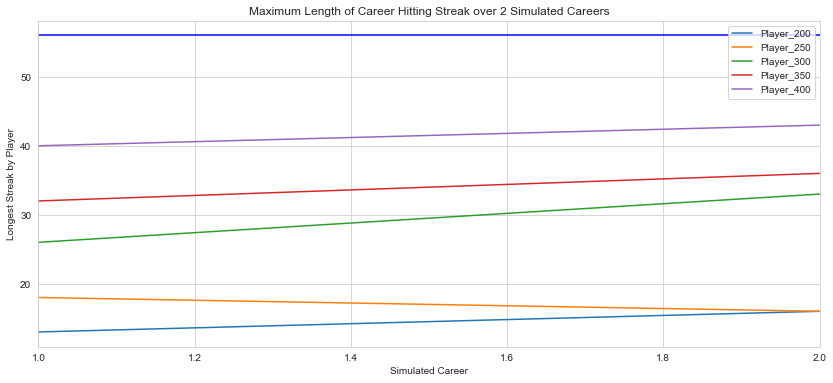

In [41]:
streak_df.plot(figsize=(14,6))
plt.axhline(y= 56, color ='b', label='Joe D Record')
plt.ylabel('Longest Streak by Player')
plt.xlabel('Simulated Career')
title_text = 'Maximum Length of Career Hitting Streak over ' + str(run_count) + ' Simulated Careers'
plt.title(title_text)

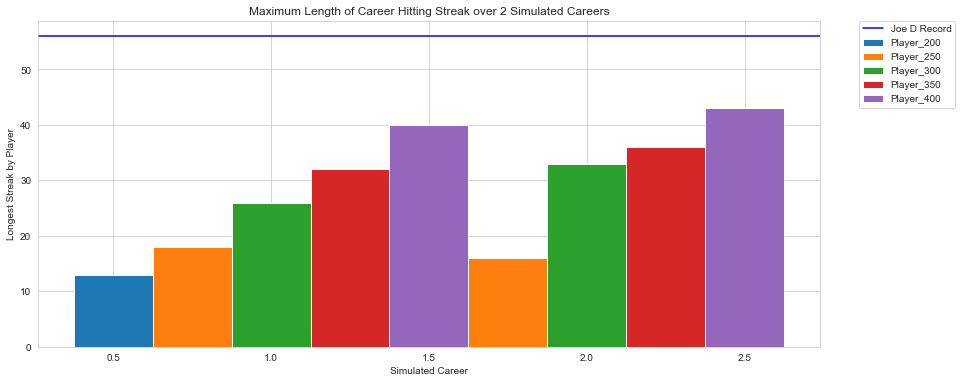

In [42]:
plt.figure(figsize=(14,6))
plt.bar(streak_df.index-0.5, streak_df.Player_200, width=0.25,  label ='Player_200') 
plt.bar(streak_df.index-0.25, streak_df.Player_250, width=0.25, label ='Player_250') 
plt.bar(streak_df.index, streak_df.Player_300, width=0.25, label ='Player_300') 
plt.bar(streak_df.index + 0.25, streak_df.Player_350, width=0.25, label ='Player_350') 
plt.bar(streak_df.index + 0.5, streak_df.Player_400, width=0.25, label ='Player_400') 
plt.axhline(y= 56, color ='b', label='Joe D Record')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Longest Streak by Player')
plt.xlabel('Simulated Career')
title_text = 'Maximum Length of Career Hitting Streak over ' + str(run_count) + ' Simulated Careers'
plt.title(title_text)
plt.show()

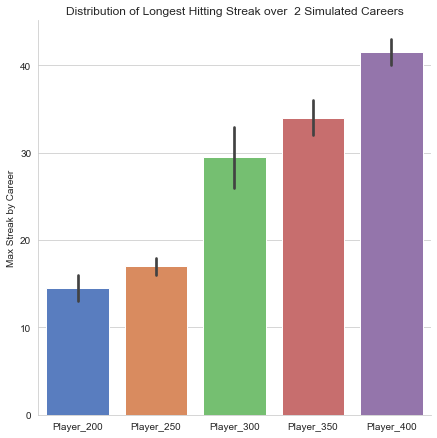

In [43]:
g = sns.catplot( data=streak_df,
                height=6, kind="bar", palette="muted")
g.set_ylabels("Max Streak by Career")
title_text = 'Distribution of Longest Hitting Streak over  ' + str(run_count) + ' Simulated Careers'
plt.title(title_text)
plt.show()

In [44]:
streak_df.head()

,Player_200,Player_250,Player_300,Player_350,Player_400
1,13,18,26,32,40
2,16,16,33,36,43


In [45]:
mean_df = streak_df.mean()
median_df = streak_df.median()
min_df = streak_df.min()
max_df = streak_df.max()
std_plus_df = mean_df + streak_df.std()
std_minus_df = mean_df - streak_df.std()

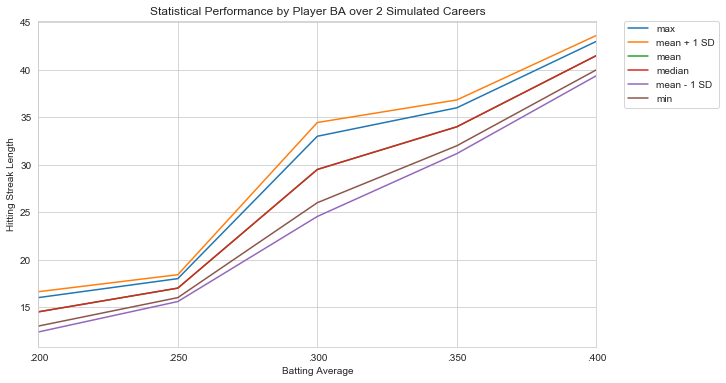

In [46]:
max_df.plot(figsize=(10,6))
std_plus_df.plot()
mean_df.plot()
median_df.plot()
std_minus_df.plot()
min_df.plot()
plt.xticks([0,1,2,3,4],['.200','.250','.300','.350','.400'])
plt.legend(['max','mean + 1 SD','mean', 'median','mean - 1 SD','min'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Hitting Streak Length')
plt.xlabel('Batting Average')
title_text = 'Statistical Performance by Player BA over ' + str(run_count) + ' Simulated Careers'
plt.title(title_text)
plt.show()